**À faire**

- Introduction
  - Description du dataset : mise à jour à partir des datasets finaux
  - Objectif technique : parler du cold start problem
  - The challenge *Théo*
  - Définition du problème de manière scientifique et introduction des variables *Théo*
- Metrics — *Lokmen*
  - Plus justifier
  - Prendre une métrique classique (RMSE) et une métrique secondaire (MAE)
- EDA / visualisations — *Youssef*, *Omar*
  - Heatmap des notes (sur une partie des données)
  - Visualisations avec les meta données
- Premier modèle (SVD) — *Maxime*
  - Mise en forme du code (sous forme d'un estimateur sk-learn)
  - Équation et explications
  - Évaluation
- Deuxième modèle (avec utilisation des métadonnées)  — *Maxime*
  - Mise en forme du code (sous forme d'un estimateur sk-learn)
  - Équation et explications
  - Évaluation
- Partie GitHub
  - problem.py — *Théo*
  - Presenter le starter_kit comme un challenge, intro avec quoi installer et outtro sur commment participer etc *Théo*
  - requirements.txt
  - submissions/starting_kit avec l'estimator
  - Creer un small dataset de train et test pour le quick mode *Maxime*

<img src='https://learnprimary.com.au/wp-content/uploads/2018/08/Girl-Choose-Book.jpg'>


<h1>Mimicking Amazon's Recommendation System for books<h1>



*Youssef Brachmi, Théo Dullin, Omar El Mellouki, Lokmen Eltarr, Maxime Berillon*

# Introduction


## Motivation

With the advent of technology, we witnessed a major outburst in social media contents and streaming services. The average person spends 3 hours and 15 minutes a day on its phone, more intensive users such as teenagers can spend up to 5 hours each day on their phones. One of the main collateral damages of all this content consumption is reading books. 
In 2018, a European survey showed that the average time spent reading books per day was 12 minutes in Finland and Poland, 7 minutes in Germany and Luxembourg, but only 2 min in France, the last in Europe.

Many reasons can explain the lack of reading in the general population, but the main one is because reading a book is a long commitment that requires several hours, distributed in several successive days in order not to forget the context. This can prove to be very challenging for a majority of people and be a deterrent to start any book. Also, we don’t all have the time to go to a library and spend an hour reading back covers and choosing the right books.

To cope with this, one has to choose wisely and only commit when sure that a book is interesting and deserves the time. Unfortunately, we don’t all have a relative or a friend that has read all books and advises us according to our preferences, but another way is using the same technology that distracts us from reading books, to encourage us reading books. 

Amazon, one of the biggest technology companies, started as a bookstore, an online one. From the comfort of your own home, you can order a book and receive it 2 days later in your mail. Another advantage of this online bookstore, is that users, readers in this case, can put reviews and notations for each book, with short comments to describe what they liked and disliked. This helps with book recommendations for each user, given his history of purchases and the various reviews for all books, a recommendation engine can produce a list of possible matches to what he would want next, thus having only a shortlist to choose from and spend more time in reading.

## Scientific research 

In their article *Beyond Books: The Extended Academic Benefits of Library Use for First-Year College Students*  Soria et al. described how the use of library and most importantly book can have a positive impact on the academic outcomes of college students. Therefore it is crucial to advise them well.

In another study called *A book reading intervention with preschool children who have limited vocabularies: the benefits of regular reading and dialogic reading*, Hargrave et al. focused on a younger generation and conclude in a similar way. They studied the influence of book reading to children who had poor vocabulary skills. These book reading interventions were very conclusive : the children exposes to these sessions rapidly gained vocabulary. This further stresses our point that book are vital for personal developement.

## Netflix prize

<center><img src='https://media.wired.com/photos/5933082958b0d64bb35d419f/191:100/w_1280,c_limit/netflixprize.jpg'></center>


In 2006 Netflix announced the creation of a special competition. The idea was simple : they provided a training dataset with user and reviews of movie and expected the participants to come up with a recommandation algorithm for their movies. The benchmark was one of their previous algorithm *Cinematch*. The leaderboard was based on the RMSE of each algorithm. In 2009, the winning team eventually won 1 million dollars !

The idea here is quite similar but with books. And the prize is not 1 million dollars but 5 ECTS!

# The challenge

## Problem Desciption

The challenge that is proposed here is to build a book recommander system. Based on information about a list of books and the reviews of some users, the aim is to predict a list of book that a user is the most likely to like i,e, that he would review with a high rating.
<br>
We suppose that we have a set $U$ of users and a set $B$ of books available to recommand. If the user $u$ has rated the book $i$, then we denote $r_{ui}$ the rating given by $u$ to the book $i$. Of course, in the real life, all users does not review all books because they didn't read all books and because they don't review all the books that they read. <br> If we define $\Omega=\{(u,i) \in U \times B \ \text{such that u reviewed i}\}$, we are looking to predict all $r_{ui}$ for $(u,i) \notin \Omega$. These prediction are called $(\widehat{r}_{ui})_{(u,i)\notin \Omega}$.<br>

*Important remark :* The rating of books on Amazon can only be 1,2,3,4 or 5. Thus, this looks like a classification problem. However, as we are interested into giving a list of most relevant books to a user. If a model gives the rating of 5 to a big list of books, it will be hard to discriminate books among this list and to recommand a small amount of books. Then, we are increasing the rating space by relaxing the discrete constrainte. The challenge proposed is then a regression problem that aims at predicting the rating in a continious space.

## Description of the dataset

The dataset used comes from the Amazon review data. It is a data set released in 2018 countaining reviews and metadata of products from May 1996 to Oct 2018. It is available here : [Amazon review data (2018)](https://nijianmo.github.io/amazon/index.html?fbclid=IwAR22w2ilC3jHIzAp_hnMsMLl8fiB6tpqJGxHWYqt5S8b5CCPqXqkgdH2lMQ#sample-metadata)
The first version of the dataset were released in 2014, countained only reviews composed of ratings, text and helpfulness of votes. It is available here [Amazon review data (2014)](http://jmcauley.ucsd.edu/data/amazon/index_2014.html) The first dataset had 142.8 million reviews up to July 2014. The updated version used in this challenge adds more reviews (233.1 million reviews up to October 2018). It also adds metadata about products such as descriptions, category information, price, brand, and image features.
<br>
<br>
The dataset is separated into categories of products sold on Amazon. The category that interests us is "books". It is composed of 51 311 621 reviews. 
<br>
The number of books review is very big and can induce a lot of calculation time. Moreover, a lot of products have only been reviewed a small amount of time and a lot of users have only given a small amount of reviews. This implies that the behavior of people that gave a small amount of review will be difficult to catch. Furthermore, it will be hard to recommand books that have a small amount of review to other people.
For all these reason, the number of data for this challenge has been reduced. We extract from the data the k-core, which means that each of the remaining users and items have k reviews each. We choose the integer k qualitatively to reduce significantly the size of the data while keeping a good amount of it. The k selected is : **10** which lead to a dataset of **4586** reviews. This leaves us with 320 user and 801 products.
<br>
<br>
In the metadata, only the metadata associated to the selected reviews have been kept. All descriptions, category information, price and brand have been kept. For exmaple the image features have been dropped from the original dataset because the possibility to use it would complexify a lot the challenge and we would like it to be out of the scope of this challenge.
<br>
<br>
The original data is on JSON format. After the preprocessing of the k-core, the data has been exported to the CSV format and correspond to the data available for this challenge.

The data contains the following columns:

- reviewerID — ID of the reviewer, e.g. A2SUAM1J3GNN3B
- productID — ID of the product, e.g. 0000013714
- categories — list of categories the product belongs to
- description — description of the product
- title — name of the product
- rank — sales rank information
- brand — brand name
- price — price in US dollars (at time of crawl)


## The cold-start problem

The objective of this challenge is to accurately predict the target variable *ratingScore* based on the variables describing the previous purchases and reviews given by the user. The purpose of the study is to recommend relevant products that a user whose history of purchase is known might be interested in buying. We therefore consider that the previous products the user has bought will give an indication on those he would buy. 

However when a new user registers to the platform we have no prior information on his buying habits, and therefore cannot proceed to any inference since we cannot base it on any history. This issue, which is called the *Cold start for a new user*, is usually dealt with by asking the new user to provide some preferences to build an initial user profil, which will later be refined as the user uses the platform. However, a compromise must be made between the registration process and the amount of initial data required to build a profil, since the user might abandon the registration if its too long, and not enough data could lead to poor quality of recommendation.

When a new product is added to the data base however it is possible to recommend it to known users based on its proximity to know products. We will see how in the second model approached here.

# Metrics

In order to measure the accuracy of our recommendations, we need a measure. The function cost we have to minimize should be a distance between the user's reviews and our predictions for this reviews.

Several metrics can be used to evaluate the performance of the book recommander. Here are a few.

## MAE

The *Mean Absolute Error* (MAE) has the same scale of the reviews themselves (from 1 to 5). If it equals 0.7 it means that on average the algorithm 0.7 point off.

$$
\text{MAE} =
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
|\hat{r}_{u,i}-r_{u,i}|
$$

The drawback of the MAE is that we cannot use it to compare results between datasets if the scale are different. That is shy we introduce the *Normalized Mean Absolute Error* (NMAE) :

$$
\text{NMAE} =
\frac{1}{n(r_{high}-r_{low})}
\sum_{(u,i) \notin \Omega}
|\hat{r}_{u,i}-r_{u,i}|
$$

The MAE may be not enough for this problem. Generaly it tends to give more importance to large deviation compared to small deviation. Since NMAE is more balanced we want to use it.

In [23]:
def mae(a,b):
    return np.mean(np.abs(a-b))

## MSE

The *Mean Squared Error* (MSE) is similar but tends to penalize more larger errors of the recommendation system. For example it will penalize more one failure of 2 points that eight repeted failures of 0.5 point.

$$
\text{MSE} =
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
(\hat{r}_{u,i}-r_{u,i})^2
$$

In [24]:
def mse(a,b):
    return np.mean((a-b)**2)

## RMSE
Since we want to score how close are our predictions are to the ground truth, the first metric we will use is the root-mean-square error.

The *Root Mean Squared Error* is the same as the MSE but with a square root. Like MAE it has the same units as the date. This measure of accuracy was chosen for the *Netflix Prize* and hence we will use it too to assess this challenge

$$
\text{RMSE} =
\sqrt{
\frac{1}{n}
\sum_{(u,i) \notin \Omega}
(\hat{r}_{u,i}-r_{u,i})^2
}
$$

In [22]:
def rmse_f(a,b):
    return np.sqrt(np.mean((a-b)**2))

So the RMSE will be our first metric and NMAE will be the second and we will consider both.


# Data & imports

## Prerequisites

- `numpy`
- `pandas`
- `scikit-learn`
- `matplotlib`
- `seaborn`
- `ast`

<br>
You can install all requisite modules with pip install -r requirements.txt

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline
import seaborn as sns
sns.set()

## Import

In [361]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()

# Exploratory data analysis

In [362]:
data = X_train.copy()
data['ratingScore'] = y_train

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reviewerID   4586 non-null   object 
 1   productID    4586 non-null   object 
 2   category     4586 non-null   object 
 3   description  4586 non-null   object 
 4   title        4586 non-null   object 
 5   brand        4577 non-null   object 
 6   rank         4586 non-null   object 
 7   price        4250 non-null   object 
 8   ratingScore  4586 non-null   float64
dtypes: float64(1), object(8)
memory usage: 322.6+ KB


In [364]:
print('Number of unique users: ',len(np.unique(data.loc[:,['reviewerID']].values)))

Number of unique users:  320


In [365]:
print('Number of unique products: ',len(np.unique(data.loc[:,['productID']].values)))

Number of unique products:  801


In [366]:
print('Number of possible reviews: ',len(np.unique(data.loc[:,['productID']].values))*len(np.unique(data.loc[:,['productID']].values)))

Number of possible reviews:  641601


In [367]:
print('Number of possible reviews: ',100-100*len(data)/(len(np.unique(data.loc[:,['productID']].values))*len(np.unique(data.loc[:,['productID']].values))))

Number of possible reviews:  99.2852255529527


This means the sparsity of our user-product matrix is around 99% which makes the problem solvable.

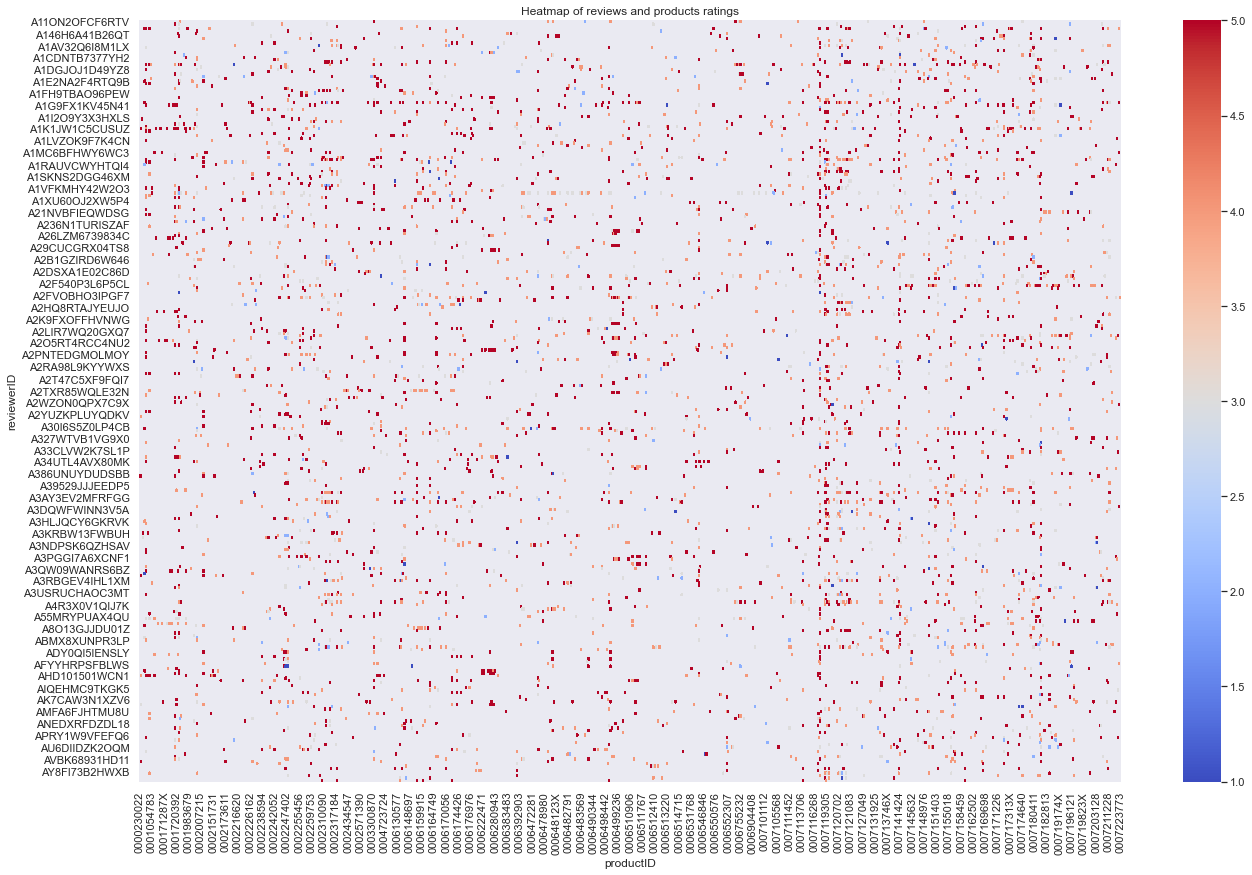

In [368]:
# Plot a heatmap of reviews and products ratings

plt.figure(figsize=(22, 14))
colormap = plt.cm.coolwarm
sns.heatmap(data.iloc[:,].pivot(index = 'reviewerID',
                                columns = 'productID',
                                values = 'ratingScore'),
            cmap = colormap)
plt.title('Heatmap of reviews and products ratings')
plt.show()

We can see that there is a lot of sparcity, which is normal, not every user reviewed every single book, and no book is reviewed by all users.

What is more interesting though is to see that the more a book is read, the higher its ratings, which we would suspect given that only good and famous books are read by a lot of people. We can also observe that some users are more severe than others, giving lower ratings in general.

This entails us to see the distribution of average rating per user.

In [369]:
# Add the mean rating per reviewer

reviewer_rating = data.groupby(['reviewerID'])['ratingScore'].mean()
data = pd.merge(data,reviewer_rating, how = 'left', on = 'reviewerID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'mean_rating_reviewer'})

# Add the number of reviews per product

product_rating = data.groupby(['productID'])['reviewerID'].count()
data = pd.merge(data,product_rating, how = 'left', on = 'productID')
data = data.rename(columns = {'reviewerID_x':'reviewerID',
                              'reviewerID_y':'nb_reviews_product'})

# Add the number of reviews per reviewers

nb_reviews_reviewer = data.groupby(['reviewerID'])['ratingScore'].count()
data = pd.merge(data,nb_reviews_reviewer, how = 'left', on = 'reviewerID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'nb_reviews_reviewer'})

# Add the mean rating per product

product_rating = data.groupby(['productID'])['ratingScore'].mean()
data = pd.merge(data,product_rating, how = 'left', on = 'productID')
data = data.rename(columns = {'ratingScore_x':'ratingScore',
                              'ratingScore_y':'mean_rating_product'})

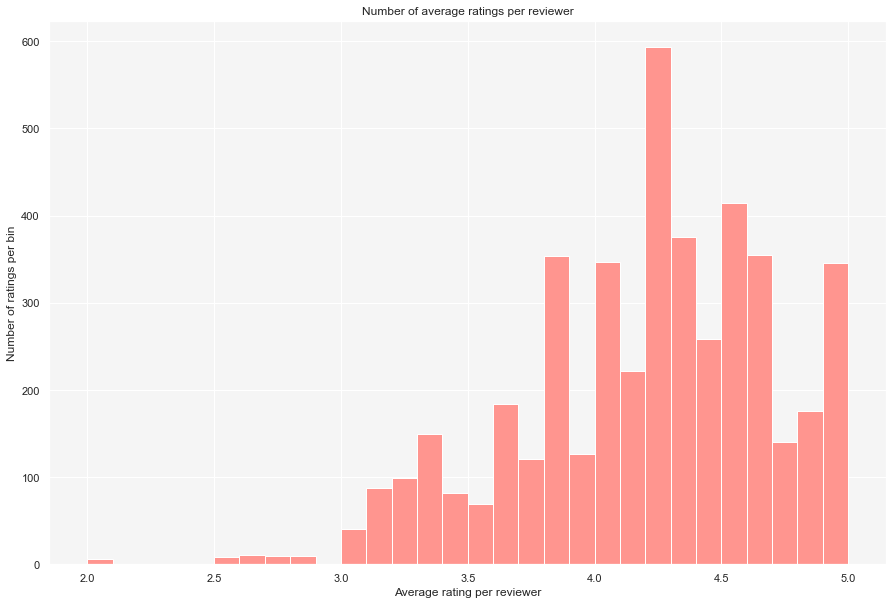

In [370]:
# Distribution of the average rating per reviewer

fig = plt.figure(figsize=(15, 10))
plt.hist(data['mean_rating_reviewer'],bins=30, color='#ff958f')
plt.xlabel('Average rating per reviewer')
plt.ylabel('Number of ratings per bin')
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
ax.set_title('Number of average ratings per reviewer')
plt.show()

We see that the average rating per reviewer is quite distributed, which we wouldn't suspect at first. Indeed, either some users seem to be more severe than others or they just didn't find enough interesting books for them. A majority of voters however seem to rate the books they read in a satisfactory fashion, giving a rating between 4 and 4.5. This could either mean that the users bypass the recommendations and only buy books which they are sure they will like, or the recommended products are well received. Coincidently, we also notice that some books were very poorly rated by the reviewers, showing either that the recommended books were not adapted (maybe due to the cold-start issue), or that the spontaneously purchased elements were disappointing.  

The average rating per user is very important to our project. Given that we want to give the best recommendations to each reader, we have to maximize the expectancy of this average.

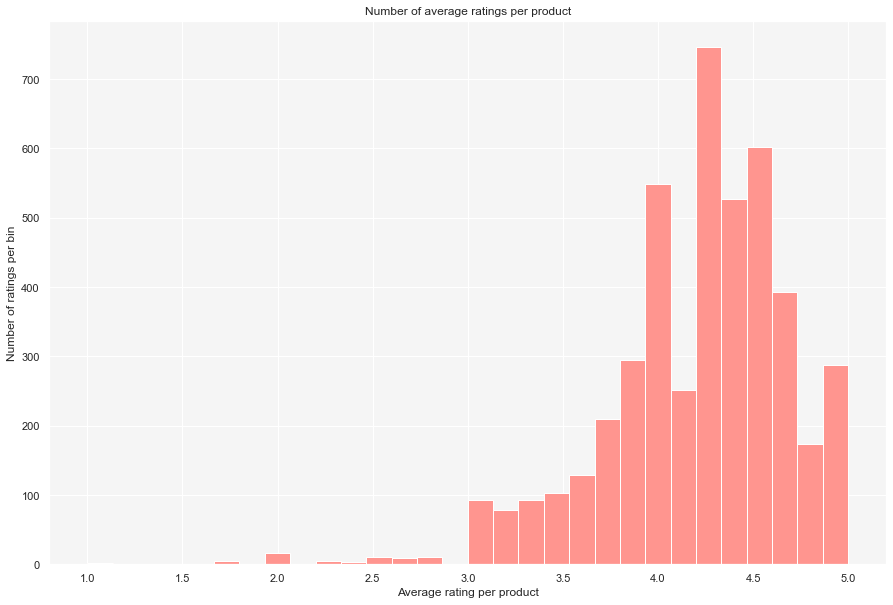

In [371]:
# Distribution of the average rating per product

fig = plt.figure(figsize=(15, 10))
plt.hist(data['mean_rating_product'],bins=30, color='#ff958f')
plt.xlabel('Average rating per product')
plt.ylabel('Number of ratings per bin')
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
ax.set_title('Number of average ratings per product')
plt.show()

We also see that the average rating per product is quite distributed as well, this is more expected but important for us. Even if the range of rating scale is from 1 to 5, only very few books are rated below 3, meaning that users generally read a book only when they suspect they will like it. 

Unlike other types of product, in which elements like the manufacturing quality, the durability, or the packaging, in the case of books the only element which will decide if a book is well rated or not (except in situations where their was an issue with the delivery or the transaction, therefore having nothing to do with the book in and of itself) is the appreciation of the reader of said book. Hence, the fact that some of the products were given bad ratings does not necessarily mean that they should be less put forward, but rather that they are recommended to the wrong category of customers. 

Another element which arises from the analysis of this plot is the correlation between the average rating of a product and the number of ratings said product has received. We often notice ourselves when shopping that the products which are highly rated have also received far more reviews than similar products, and are therefore heavily put forward by the platform. This element should not be neglected, as the comments and ratings given by other customers (and therefore their satisfaction with the product or lack thereof) are a critical factor in the final decision to buy or not. 

To better take into account the distribution of the ratings, one can normalize the ratings to improve some models.

In [372]:
data.head(10)

,reviewerID,productID,category,description,title,brand,rank,price,ratingScore,mean_rating_reviewer,nb_reviews_product,nb_reviews_reviewer,mean_rating_product
0,AOGE8PM6KED3O,0007133766,"['Books', 'Science Fiction & Fantasy', 'Fantasy']",[],Flight of the Nighthawks (Darkwar),Visit Amazon's Raymond E Feist Page,"2,095,763 in Books (",$14.83,2.0,3.642857,8,14,4.000000
1,A21NVBFIEQWDSG,0007140975,"['Books', 'Politics & Social Sciences', 'Polit...","['""[A] very well-written rant against all the ...",How Mumbo-Jumbo Conquered the World: A Short H...,Visit Amazon's Francis Wheen Page,"3,310,195 in Books (",$3.00,4.0,4.142857,2,14,3.000000
2,A30KEXFT9SILL6,0001047868,"['Books', 'Literature & Fiction', 'Classics']","[""Grade 6 Up-Kidnapped by Robert Louis Stevens...",Kidnapped (HarperCollinsAudioBooks),Visit Amazon's Robert Louis Stevenson Page,"13,878,095 in Books (",NaN,5.0,3.891304,10,46,4.000000
3,A1DW4U1LQV0XW7,0006755224,"['Books', 'Teen & Young Adult']","[""A powerful being fights for his life within ...",Dogsbody,Visit Amazon's Diana Wynne Jones Page,"649,756 in Books (",NaN,3.0,4.250000,5,12,3.600000
4,A2RA98L9KYYWXS,0006159990,[],[],Murder in the Mews,Visit Amazon's Agatha Christie Page,"3,556,182 in Books (",$4.16,3.0,3.777778,12,18,4.416667
5,A2HFL26OQJ2T9X,0006513905,"['Books', 'Literature & Fiction', 'Contemporary']",['The cult classic that can still change your ...,The Dice Man,Visit Amazon's Luke Rhinehart Page,"799,132 in Books (",$13.09,4.0,3.062500,2,16,4.500000
6,A1JH5J1KQAUBMP,0007115288,"['Books', 'Literature & Fiction', 'Contemporary']","[""'Mailer writes like an angel - a master of s...",An American Dream (1960s A S.),Visit Amazon's Norman Mailer Page,"13,976,882 in Books (",$46.90,4.0,4.125000,1,16,4.000000
7,ACIBQ6BQ6AWEV,0002310899,"['Books', 'Mystery, Thriller & Suspense', 'Mys...","[""'Nothing should be taken for granted.' Spect...",Destination Unknown (Agatha Christie Collection),Visit Amazon's Agatha Christie Page,"2,766,478 in Books (",$26.27,3.0,3.861111,14,36,4.071429
8,AUM3YMZ0YRJE0,0001048767,"['Books', 'New, Used & Rental Textbooks', 'Hum...",['William Shakespeare is widely regarded as th...,Othello: Complete &amp; Unabridged,Visit Amazon's William Shakespeare Page,"18,682,789 in Books (",NaN,3.0,3.846154,39,13,4.615385
9,A2NJO6YE954DBH,0001713167,"['Books', ""Children's Books"", 'Growing Up & Fa...","['If you want a green kangaroo, a skateboard T...",Please Try to Remember the First of Octember (...,Theo Le Sieg,"4,480,270 in Books (",$2.94,5.0,4.619048,3,21,4.333333


In [373]:
# Transform rank feature from string to int

def from_string_to_int(string):
    return int(string.split()[0].replace(',',''))

data['rank'] = data['rank'].apply(from_string_to_int)

print('Ranks range from '+str(min(data['rank']))+
      ' to '+str(max(data['rank'])))

Ranks range from 36170 to 20472904


The ranks are the one given by the website, it's based on an algorithm that combines ratings, number of ratings, visitors and quite a lot of other parameters. The ranks are also relative to a certain category of books, and a high rating could be achieved by narrowing enough the category in which the book falls.

Before constructing a model based on this feature, one has to verify that it doesn't bias the model.

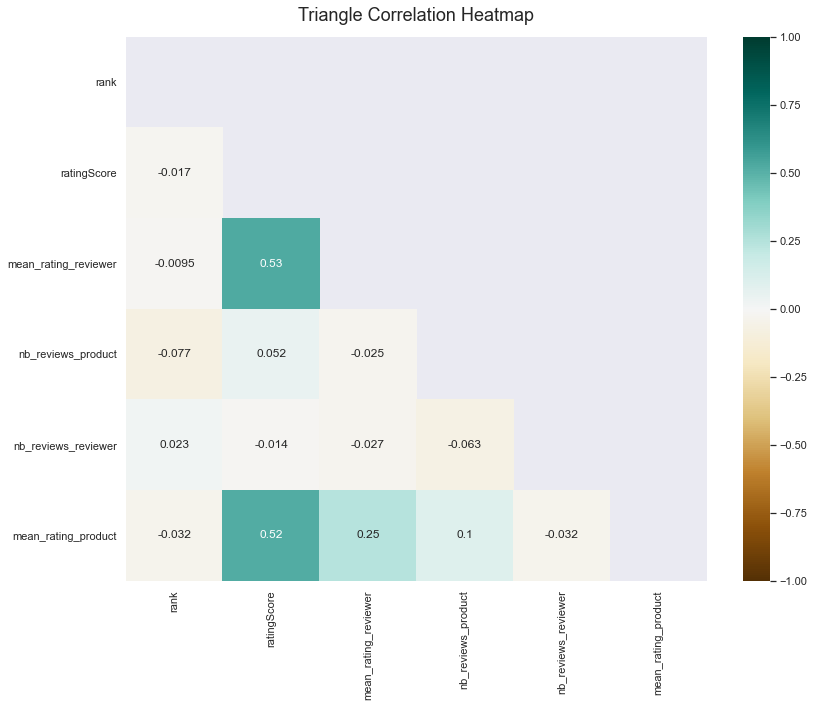

In [374]:
# Plot correlation matrix

corr = data.corr()

plt.figure(figsize=(13, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                      annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize':18}, pad=16)
plt.show()

Surprinsigly, the rank is not very correlated to the mean rating per reviewer nor the mean rating per product. Maybe the rank is based on some other unknown features.\
We notice that the rating is heavily correlated to the mean rating per product, which was to be expected. The rating score is also very correlated to the mean rating per reviewer. This element shows that which we highlighted earlier, namely that the users rate the products in a homogenous fashion. Again this could show that the customers only buy books which they are sure they will like, or they only leave reviews if they're satisfied by the products. Conversely, this could also mean that if a customers mean rating is low, then maybe he only leaves reviews on books which he was not satisfied with. 

To further explore this relationship between the ratings and the number of reviews we plot the subsequent graph

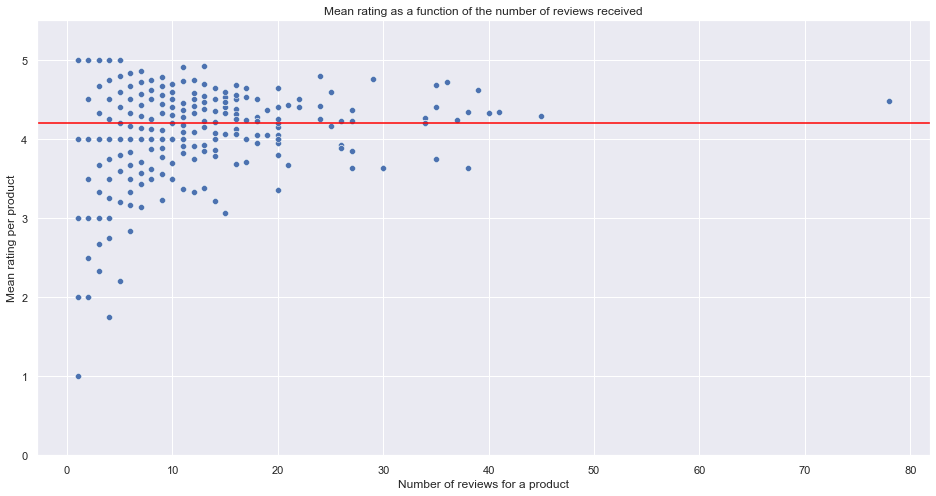

In [375]:
# Average rating per product with respect to its number of reviews

fig, axis1 = plt.subplots(1,1,figsize=(16,8))
plt.ylim(0,5.5)
sns.scatterplot(x="nb_reviews_product", y="mean_rating_product",ax=axis1, data = data)
axis1.axhline(y= data['ratingScore'].mean(), color='red')
plt.xlabel('Number of reviews for a product')
plt.ylabel('Mean rating per product')
plt.title('Mean rating as a function of the number of reviews received')
plt.show()

We see that the more reviews a product has, the higher its rating. This confirms our intuition that readers only read a book they think they'll like, and the most read books are generally the best ones and the highest rated. Nevertherless, books with lots of reviews are rated close to 4.2, not 5. 

This correlation however is not a causality. Indeed, the fact that a book has been reviewed many times does not necessarily mean that it is good, but points in that direction, as the number of reviews grows with the number of sales, which in turn mainly raise due to elements such as marketing, a cultural phenomenon (the release of a movie inspired from said book for instance), and of course the intrensic quality of the book. This should always be kept in mind, since those elements are impossible to predict or even quantify, and therefore useless when builind a machine learning model. 

In [378]:
# Let's clean the data for further development of the models

data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['brand'] = data['brand'].replace(['Visit Amazon\'s ','Page'],'', regex=True)
data['category'] = data['category'].replace(['\'Books\', ',']','\[','\'','\"'],'', regex=True)

data.head()

,reviewerID,productID,category,description,title,brand,rank,price,ratingScore,mean_rating_reviewer,nb_reviews_product,nb_reviews_reviewer,mean_rating_product
0,AOGE8PM6KED3O,0007133766,"Science Fiction & Fantasy, Fantasy",[],Flight of the Nighthawks (Darkwar),Raymond E Feist,2095763,14.83,2.0,3.642857,8,14,4.000000
1,A21NVBFIEQWDSG,0007140975,"Politics & Social Sciences, Politics & Government","['""[A] very well-written rant against all the ...",How Mumbo-Jumbo Conquered the World: A Short H...,Francis Wheen,3310195,3.00,4.0,4.142857,2,14,3.000000
2,A30KEXFT9SILL6,0001047868,"Literature & Fiction, Classics","[""Grade 6 Up-Kidnapped by Robert Louis Stevens...",Kidnapped (HarperCollinsAudioBooks),Robert Louis Stevenson,13878095,NaN,5.0,3.891304,10,46,4.000000
3,A1DW4U1LQV0XW7,0006755224,Teen & Young Adult,"[""A powerful being fights for his life within ...",Dogsbody,Diana Wynne Jones,649756,NaN,3.0,4.250000,5,12,3.600000
4,A2RA98L9KYYWXS,0006159990,,[],Murder in the Mews,Agatha Christie,3556182,4.16,3.0,3.777778,12,18,4.416667


In [379]:
# Get all book categories and number of their occurences in a sorted dictionary

categories = data['category'].apply(lambda x: x.split(','))
categories = [item for sublist in categories for item in sublist]
categories = [item.strip() for item in categories]
categories.remove('')

occur = {}
for i,item in enumerate(categories):
    occur[item] = occur.get(item, 0) + 1
occur['None'] = occur.pop('')
occur = sorted(occur.items(), key=lambda x: x[1], reverse=True)
occur = {item[0]: item[1] for item in occur}

In [380]:
plt.rcParams.update({'font.size': 22})

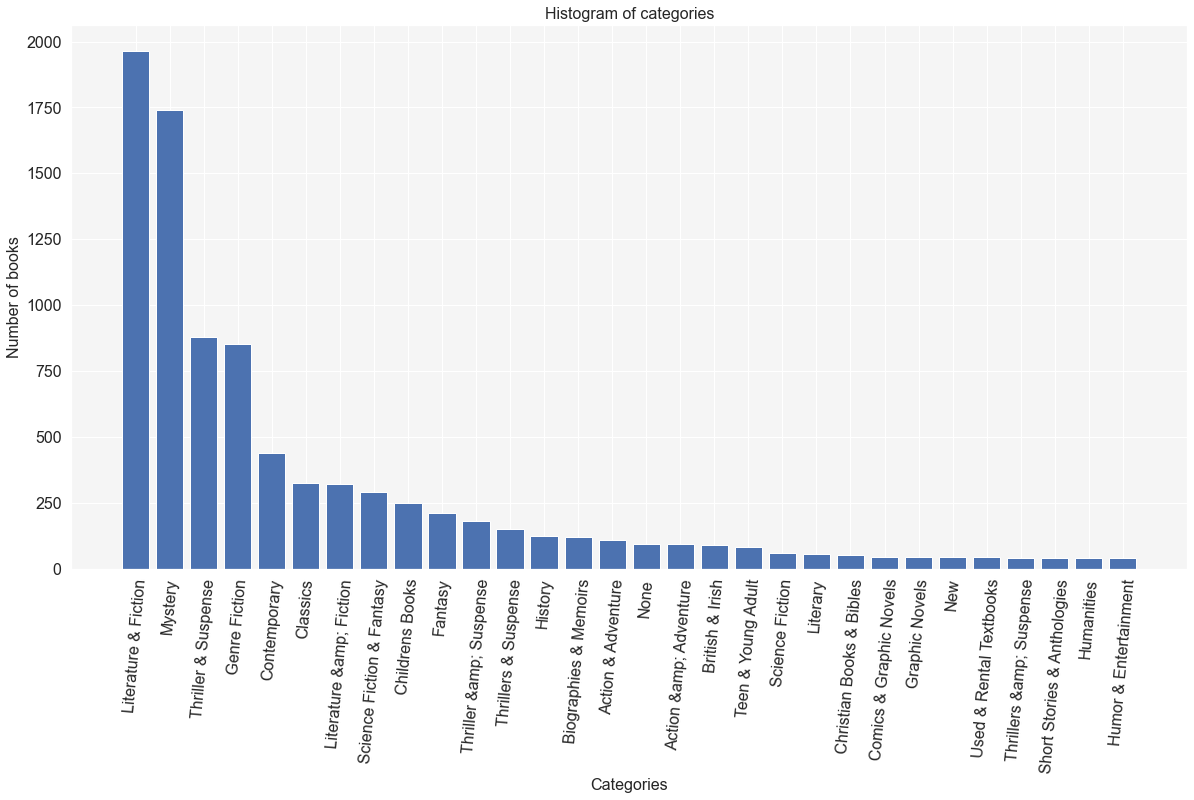

In [381]:
# Plot a histogram of the 30 first categories

categories_1 = list(occur.keys())[:30]
occurences_1 = list(occur.values())[:30]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(categories_1,occurences_1)
plt.xticks(rotation=85)
plt.xlabel('Categories')
plt.ylabel('Number of books')
ax.set_facecolor('#f5f5f5')
ax.set_title('Histogram of categories')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16) 
plt.show()

# Get font sizes in plot to default
plt.rcParams.update({'font.size': 22})

This histogram shows the categories by occurences. The majority of books are either from 'Litterature & Fiction', 'Mystery', or 'Thriller & Suspens'. Note that the categories are not mutually exclusive.\
What would be more important to see is the interactions between categories from books, so that for example if a lot of books from 'Thriller & Suspens' are also in 'Mystery', and some user likes 'Thriller & Suspens', we would also recommend books from 'Mystery'.

## A first model using SVD

The first model we are going to use is part of the *model-based* approaches. These modeles were made famous during the Netflix Prize in 2006. They mainly rely on matrix factorization methods.

If we denote $X \in \mathbb{R}^{n \times m}$ our user-product matrix for $n$ clients and $m$ products where $x_{i,j}$ is the review of user $i$ for product $j$. This matrix is sparse : there are a lot of unknown coefficients in it. Our model will try to fill it basedd on what he already has.

This thus becomes an imputation problem. We try to estimate a complete matrix $Z \in \mathbb{R}^{n \times m}$ such that $Z \approx X$. To make the problem easier let's assume $Z$ can be represented by a lower rank $k$ matrix such that $k \ll min(m,n)$. Then we can find $Z \approx V  G$ with $V \in \mathbb{R}^{n \times k}$ and $G \in \mathbb{R}^{k \times m}$.

Let $\Omega \subset \{1,...,n\} \times \{1,...,m\}$ be the index for whom $x_{i,j}$ is observed. Let's consider the following problem :

$$
\min_{Z \in \mathbb{R}^{n \times m}} \text{rang}(Z) \; \;
\text{s.c.} \sum_{(i,j) \in \Omega} (X_{i,j}-Z_{i,j})^2 \leq \delta
$$

The problem is too hard for $\Omega \neq \emptyset$. Otherwise if $\Omega = \emptyset$ we can take :

$$
Z^k = U_k \Sigma_k V_k^T
$$

with $U_k \in \mathbb{R}^{n \times k}$ orthogonal, $V_k \in \mathbb{R}^{m \times k}$ orthogonal and $\Sigma \in \mathbb{R}^{k \times k}$ such that $\Sigma_k = diag(\lambda_1,...,\lambda_k)$.

Let's consider an equivalent problem :

$$
\min_{Z \in \mathbb{R}^{n \times m}} \left\lVert Z \right\rVert_{*} \; \;
\text{s.c.} \sum_{(i,j) \in \Omega} (X_{i,j}-Z_{i,j})^2 \leq \delta
$$

where $\left\lVert . \right\rVert_{*}$ is the nuclear norm.

This problem is now convex thanks to the nuclear norm. Even thouhg it is simpler it reamins hard for large $X$ matrices.

Now let's consider a final problem :

$$
\min_{Z \in \mathbb{R}^{n \times m}} \frac{1}{2}
\sum_{(i,j) \in \Omega} (X_{i,j}-Z_{i,j})^2
+ \lambda \left\lVert Z \right\rVert_{*}
$$

This is a simpler problem that can be solved even with large matrices : $m$ et $n \simeq 10^5-10^6$.

We will resolve this problem with the `soft impute` algorithm.

First, let's import the required packages. For this we will use `IterativeImputer` from `sklearn`.

In [382]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Then we build our user-product matrix, here it's `ratings_matrix`. `IterativeImputer` requires a 2D array so we have to convert our matrix, here it's `ratings_array`.

In [383]:
ratings_matrix = data.pivot_table(values='ratingScore', index='productID', columns='reviewerID', fill_value=0)
ratings_array = ratings_matrix.values

With the method `fit_transform` the algorithm fills our matrix.

In [384]:
imp_mean = IterativeImputer(missing_values=0, random_state=0, min_value=1, max_value=5)
ratings_array_predicted = imp_mean.fit_transform(ratings_array)

/Users/maximeberillon/.local/lib/python3.6/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [385]:
ratings_array_predicted

array([[3.72395742, 2.82431693, 5.        , ..., 5.        , 3.95386531,
        4.76406402],
       [4.24249187, 4.56244511, 5.        , ..., 4.21769428, 3.73875888,
        3.69711425],
       [3.7449993 , 3.03853688, 5.        , ..., 4.84590387, 4.26982667,
        4.5715409 ],
       ...,
       [3.80850885, 4.12495524, 5.        , ..., 5.        , 4.29026896,
        4.51639362],
       [2.85182003, 2.82206642, 4.48497248, ..., 4.63452698, 2.2117206 ,
        4.68500904],
       [3.74189994, 2.75026137, 5.        , ..., 5.        , 3.87089441,
        4.79815968]])

This is the method implemented in our starting kit

In [386]:
def svd_prediction(matrix, array, mean, u, i):
    '''
    Given a user-product matrix and the corresponding 2D array
    Return the predicted ratingScore
    If its a new user or a new product it returns the mean ratingScore
    '''
    if i in matrix.index:
        idx_i = matrix.index.get_loc(i)
        idx_u = matrix.columns.get_loc(u)
        pred = array[idx_i][idx_u]
    else:
        pred = mean
    return pred

In [387]:
from sklearn.base import BaseEstimator

class Regressor(BaseEstimator):
    def __init__(self):
        self.imp = IterativeImputer(missing_values=0,
                                    random_state=0,
                                    min_value=1,
                                    max_value=5)

    def fit(self, X, y):
        self.mean_ratingScore = np.mean(y)
        data = X.loc[:, ['reviewerID', 'productID']]
        data['ratingScore'] = y
        self.ratings_matrix = data.pivot_table(values='ratingScore',
                                               index='productID',
                                               columns='reviewerID',
                                               fill_value=0)
        ratings_array = self.ratings_matrix.values
        self.ratings_array_predicted = self.imp.fit_transform(ratings_array)
        return self

    def predict(self, X):
        y_pred = [svd_prediction(self.ratings_matrix,
                                 self.ratings_array_predicted,
                                 self.mean_ratingScore,
                                 x[0], x[1]) for x in X.values]
        return y_pred

In [388]:
model = Regressor()
model.fit(X_train, y_train)

/Users/maximeberillon/.local/lib/python3.6/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Regressor()

In [389]:
y_pred = model.predict(X_test)

In [390]:
rmse_f(y_pred, y_test)

1.0499470572659142

## Second model introducing hybrid method

The next method we will present is hybrid: it mixes an Item-KNN with a content-based approach.

We define two types of similarity between products:
- An item-based similarity: if two items are rated in the same way then they are close
- A content-based similarity: if two items are defined by the same categories then they are close

**Content-based similarity**

To define the later we need to vectorize the products in terms of categories. We will achieve that by doing Multi Hot Encoding. In the example below we have:

- A belongs to 2 categories: fantasy and Arts
- B belongs to 3 categories: History, Arts and Litterature
- C belongs to 1 category: Fantasy
- D does not belong to any category

Product | Fantasy | History | Arts | Litterature
------- | ------- | ------- | ---- | -----------
A | 1 | 0 | 1 | 0
B | 0 | 1 | 1 | 1
C | 1 | 0 | 0 | 0
D | 0 | 0 | 0 | 0

Let's consider $u$ and $v$ that corresponds to the categories of product $i$ and $j$. The cosine similarity fo these two products are defined by:

$$
\text{CosSim}(i,j)
=\frac
{\sum_{k=1}^M u_k v_k}
{
\sqrt{\sum_{k=1}^M u_k^2}
\sqrt{\sum_{k=1}^M v_k^2}
}
$$

**Item-based similarity**

The item-based similarity is computed with the scores of each product.

$$
\text{ScoSim}(i,j) =\frac{\sum_{u \in \mathcal{U}_{i,j}} (r_{u,i}-\overline{r_i}) (r_{u,j}-\overline{r_j})}{\sqrt{\sum_{u \in \mathcal{U}_{i,j}} (r_{u,i}-\overline{r_i})^2 \times \sum_{u \in \mathcal{U}_{i,j}} (r_{u,j}-\overline{r_j})^2}}
$$

with

- $r_{u,i}$ the review given by $u$ for product $i$
- $\overline{r_i}$ the average review of product $i$
- $\mathcal{U}_{i,j}$ the set of user that both reviewed $i$ and $j$

**Combined similarity**

We can finally define the combined similarity that mixes the two approaches:

$$
\text{CombSim}(i,j) = \alpha \: \text{SemSim}(i,j) + (1-\alpha) \: NotSim(i,j)
$$

with $\alpha$ a parameter to tune.

**Predicting the review**

Let $\mathcal{N}_{u}^{k}(i)$ be the k nearest neighbors of $i$ reviewed by $u$ as defines by the similarity measure. We can now compute the prediction for product $i$ and user $u$:

$$
\hat{r}_{u,i} = \frac
{
\sum_{j \in \mathcal{N}_{u}^{k}(i)} w_{i,j} r_{u,j}
}
{
\sum_{j \in \mathcal{N}_{u}^{k}(i)} |w_{i,j}|
}
$$

Note that the reviews

*Note: this methods won't be included in a submission file, the main point here is to show what is possible with this dataset*

First a little preprocessing !

In [264]:
df = X_train.loc[:,['reviewerID','productID','category']].drop_duplicates().reset_index(drop=True)
df['ratingScore'] = y_train
df.head()

,reviewerID,productID,category,ratingScore
0,AOGE8PM6KED3O,0007133766,"['Books', 'Science Fiction & Fantasy', 'Fantasy']",2.0
1,A21NVBFIEQWDSG,0007140975,"['Books', 'Politics & Social Sciences', 'Polit...",4.0
2,A30KEXFT9SILL6,0001047868,"['Books', 'Literature & Fiction', 'Classics']",5.0
3,A1DW4U1LQV0XW7,0006755224,"['Books', 'Teen & Young Adult']",3.0
4,A2RA98L9KYYWXS,0006159990,[],3.0


Right now the category data is rather messy since we have a string and not a list of list... Even though we already show in the exploratory analysis how to deal with that type of issue let's see another way of doing things.

First we create `cat_list`: a list of list with every category of each item. Then we create `cat_list_ohe`: a list of arrays that represent each product categories as a vector.

In [265]:
import ast

cat_list = []

for i in range(len(df)):
    cat_sublist_raw = ast.literal_eval(df.iloc[i,2])
    try:
        cat_sublist_raw.remove('Books')
    except:
        pass
    cat_sublist = []
    for item in cat_sublist_raw:
        new_item = item.replace('&amp;', '&')
        cat_sublist.append(new_item)
    cat_list.append(cat_sublist)

In [266]:
unique_cat_list = list(set([item for sublist in cat_list for item in sublist]))

In [267]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(unique_cat_list)

LabelBinarizer()

In [268]:
cat_list_ohe = []

for item in cat_list:
    if not item:
        ohe_item = np.zeros(shape=len(unique_cat_list), dtype=np.int8)
    else:
        ohe_item = sum(lb.transform(item))
    cat_list_ohe.append(ohe_item)

Now that this is done we define the cosine similarity as well as the ratings similarity. These will be used to compute the combinedd similarity.

In [269]:
def cosine(u,v):
    num = np.sum(u * v)
    denom = (np.sqrt(np.sum(u))) * (np.sqrt(np.sum(v)))
    if not denom:
        return 0
    else:
        res = num/denom
    return res

In [270]:
def user_average(u):
    ratings = ratings_matrix.iloc[u].values
    mean = ratings[ratings != 0].mean()
    return mean

In [271]:
def cosine_similarity(i, j):
    list_products = df.loc[:,'productID'].values
    idx_i = np.where(list_products==i)[0][0]
    idx_j = np.where(list_products==j)[0][0]
    vec_i = cat_list_ohe[idx_i]
    vec_j = cat_list_ohe[idx_j]
    return cosine(vec_i, vec_j)

In [272]:
def ratings_similarity(i, j):
    product_list_rate = ratings_matrix.index.tolist()
    nbr_columns = len(ratings_matrix.columns)
    num, denum1, denum2 = 0.0, 0.0, 0.0
    if (i in product_list_rate)&(j in product_list_rate):
        vect_i = ratings_matrix.loc[i].values
        vect_j = ratings_matrix.loc[j].values
        for k in range(nbr_columns):
            num += (vect_i[k]-user_average(k))*(vect_j[k]-user_average(k))
            denum1 += (vect_i[k]-user_average(k))**2
            denum2 += (vect_j[k]-user_average(k))**2
        coef = num/np.sqrt(denum1*denum2)
        return coef
    else:
        return float('NaN')

In [273]:
def combined_similarity(i, j, alpha):
    return alpha * cosine_similarity(i,j) + (1-alpha) * ratings_similarity(i,j) 

Let's test it with $\alpha = 0.2$

In [274]:
combined_similarity('0007133766','0006159990',0.2)

0.7739204651712647

Seems to work like a breeze. We can now proceed and create the function that will generate the predictions. We can tune $\alpha$ and $k$ the number of neighbors selected in the computation.

In [294]:
def itemknn_prediction_f(u, i, alpha=0.2, k=5):
    also_rated = df[df['reviewerID']==u]['productID'].values
    sim = {}
    for j in also_rated:
        if not combined_similarity(i, j, alpha):
            sim[j] = 0
        else:
            sim[j] = combined_similarity(i, j, alpha)
    knn = sorted(sim, key=sim.get, reverse=True)[:k]
    num = 0.0
    denum = 0.0
    for j in knn:
        rating_j = int(df[(df['reviewerID']==u)&(df['productID']==j)]['ratingScore'].values)
        num += rating_j * combined_similarity(i, j, alpha)
        denum += combined_similarity(i, j, alpha)
    if denum == 0.0:
        result = 0
    else:
        result = num/denum
    return result

In [286]:
itemknn_prediction_f('A5S98AEI9WI7Y','0006512461')

2.8982919978132684

Works perfectly as well. Now let's use it on some test data.

In [295]:
X_test, y_test = get_test_data()

In [310]:
c = 10

y_pred = []

for index, row in X_test[:c].iterrows():
    y_pred.append(itemknn_prediction_f(row[0],row[1]))

In [311]:
rmse_f(y_test[:c],y_pred)

1.029564920168524

RMSE is not bad and is actually lower than the one we had on the SVD model. Of course we should tune the parameters and do some cross validation but that's not bad at all.

# Testing the submission locally

Once you have come up with a good model, we advise to test it locally. Do to so, the package ramp_workflow needs to be installed. The package is in the list of requirements.txt and can be installed by the following command if it is not already installed.

```
python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master
```

Your code should be written in a python file that you name estimator.py. It has to countain a function name get_estimator that returns an object of type scikit-learn like that solves the problem. <br>
This file should be found in a folder called anyway you want, itself found in the **submission/** folder.
As a example, you can find the SVD model of this notbook in the path submission\SVD\estimator.py. <br>
<br>

Your code can be tested on the data set with the folowing command :
```
ramp-test --submission <your submission folder name>
```
A Ramp-workflow option is also implemented in the problem that allow you to run your code on a smaller set of the data. This allow you to test quicker your code on a subset. The command to run your code with the quick-mode is the following : 
```
ramp-test --submission <your submission folder name> --quick-test
```

For example, to run the SVD model on quick mode, you can run the following line :






In [46]:
! ramp-test --submission SVD --quick-test

Testing Recommendation system for books
Reading train and test files from ./data ...
Reading cv ...
Training submissions/SVD ...
----------------------------
Mean CV scores
----------------------------
/opt/anaconda3/lib/python3.8/site-packages/rampwf/utils/scoring.py:53: RuntimeWarning: Mean of empty slice.
  meanss = scores.mean(axis=0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(

# More information
For more information on how to submit your code on [ramp.studio](https://ramp.studio/), refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).
You can also read the READ.ME file